### **Imports**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##### Load Dataset

In [64]:
df = pd.read_csv('insurance - insurance.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Do smokers have higher insurance charges than non-smokers?

- Null Hypothesis smokers and non-smokers have the same insurance charges
- Alternate Hypothesis: There is a significate difference in insurance charges for smokers compared to non-smokers

In [65]:
# number of smokers vs non-smokers 
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

- We will be using Two sample T-test

In [66]:
# Split data into two groups
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()



In [67]:
# Define our feature of interest
smoker_charges = smoker_df['charges']
non_smoker_charges =non_smoker_df['charges']

Text(0.5, 0.98, 'Comparison of smokers charges vs non-smokers charges')

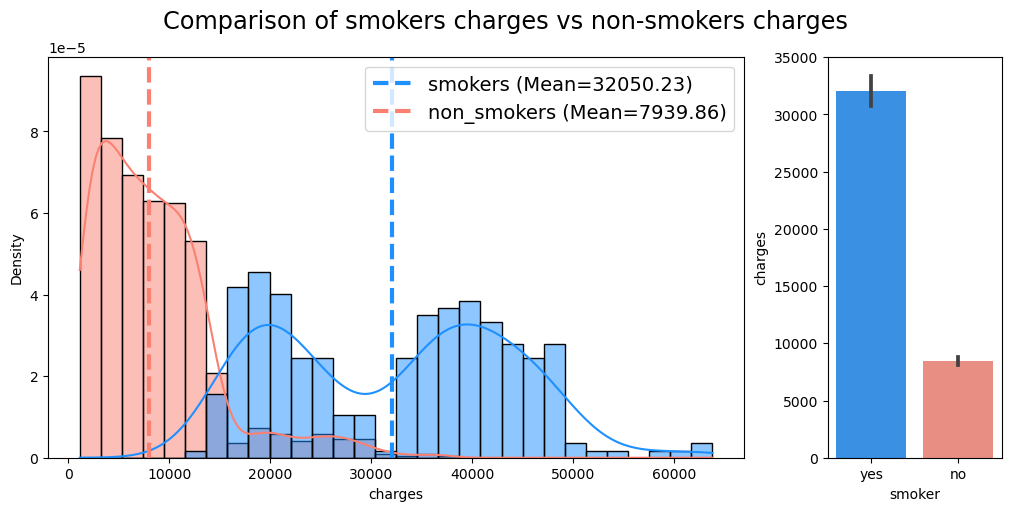

In [76]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"smokers (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"non_smokers (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of smokers charges vs non-smokers charges',fontsize='xx-large')

In [69]:
# Check for outliers in charges for smokers
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)



0

In [70]:
# Check for outliers in charges for non_smokers
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [71]:
# remove outlier for non_smokers
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [72]:
# Check for outliers in charges for non_smokers
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

19

In [73]:
# test the strength group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges


NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [74]:
# test the strength group for normality
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges


NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- Our p-values for both groups are well below 0.05, which means our data is NOT normally distributed. However our sample size are large enough to rpoceed with t-test

In [75]:
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [86]:
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

TtestResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104, df=301.26189518807416)

- Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the charges for smokers vs those of non_smokers.

### Do different regions have different charges, on average?

- Null Charges are the same accross different regions
- Alternate Hypothesis: There is a significat difference in charges across different regions
- Using an alpha=.05
- Avona test

In [78]:
# number of smokers vs non-smokers 
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

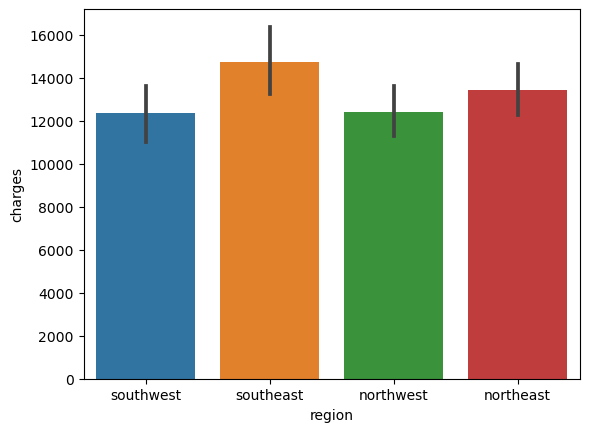

In [79]:
sns.barplot(data=df, x='region',y='charges')

In [80]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [81]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [82]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [83]:
# with the * operator 
stats.levene(*groups.values())


LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [84]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']



In [88]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


- There seems to be a signaficat difference between Southeast charges and southwest charges. 

Are men more likely to smoke than women?

- Null Hypothesis: 
- Alternate Hypothesis: Men are more likely to smoke than women
- Using an alpha=.05
- Chi-square test 

Text(0.5, 1.0, 'Number of smoker by Sex')

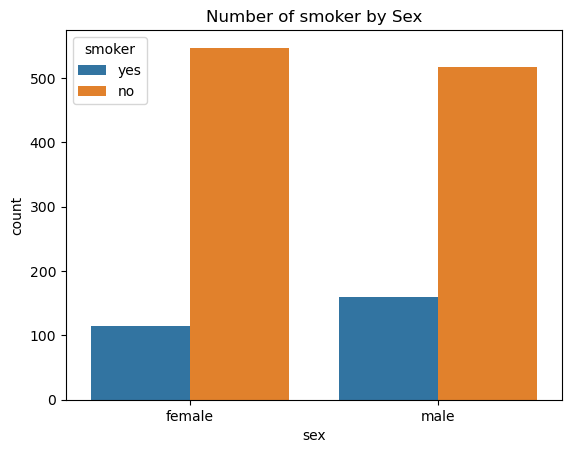

In [89]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smoker by Sex")

In [90]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [91]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results



In [92]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- our p < .05, we reject the null hypothesis that there is no relationship between a female and male smoker.
This means that we accept the alternate hypothesis and conclude that there men are more likely to smoke than women. 